In [47]:
import pandas as pd
from triedpy import triedsompy as SOM
from triedpy import triedctk as ctk
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import pandas_profiling as pp

In [2]:
data_frame_kmeans = pd.read_csv('datas_enrg/data_frame_kmeans.csv',sep = ',',index_col =0)

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.io.matlab import mio
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

def nombre_personne(tab):
    classe1 = []; classe2 = []; classe3 = [];classe4 = []; classe5 = []
    for i in range(len(tab)):
        if tab[i]==0:
            classe1.append(i)
        elif tab[i]==1:
            classe2.append(i)
        elif tab[i]==2:
            classe3.append(i)
        elif tab[i]==3:
            classe4.append(i)
        else:
            classe5.append(i)  
    return (classe1,classe2,classe3,classe4,classe5)


les indiv de chaque cluster sont: [4, 12, 17, 18, 21, 23, 29, 34, 35, 39, 40, 41, 42, 43, 44, 45, 50, 51, 55, 59, 61, 67, 68] [0, 1, 6, 8, 9, 11, 13, 14, 15, 26, 27, 30, 36, 37, 52, 53, 54, 56, 57, 58, 60, 62, 63, 64, 65, 66, 69, 70, 71] [2, 3, 5, 7, 10, 16, 19, 20, 22, 24, 25, 28, 31, 32, 33, 38, 46, 47, 48, 49] [] []
-----------------------------------------------
la taille des clusters dans l ordre: 23 29 20 0 0
-----------------------------------------------
les centres des clusters: [[ 0.58435107 -0.01749351 -0.46365093  0.02939138  0.26740922 -0.26889772
  -0.43967434  0.0599873  -0.44030727 -0.29599476  0.83102892  0.67633405
  -0.49748541  0.65721784 -0.00831067]
 [ 0.1126347   0.35017779 -0.45917762  0.4355365   0.04661024  0.69853442
  -0.2181996   0.6293299   0.72006134 -0.44453505 -0.48223751 -0.61759914
  -0.1431291  -0.63591491 -0.11020443]
 [-0.83532405 -0.48764026  1.19900612 -0.665328   -0.37510545 -0.70364253
   0.82201492 -0.98151375 -0.53773558  0.98496979 -0.256438

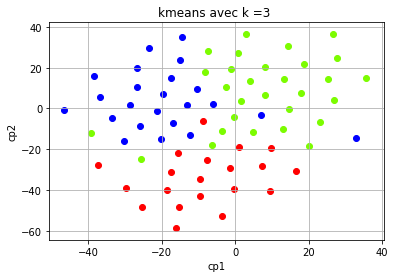

les indiv de chaque cluster sont: [1, 8, 9, 15, 26, 27, 36, 37, 53, 54, 56, 57, 60, 62, 63, 64, 65, 66, 69, 70, 71] [0, 2, 4, 5, 6, 11, 13, 14, 16, 18, 19, 20, 22, 23, 24, 30, 47, 58] [12, 17, 21, 29, 34, 35, 39, 41, 42, 43, 44, 45, 50, 51, 52, 55, 59, 61, 67, 68] [3, 7, 10, 25, 28, 31, 32, 33, 38, 40, 46, 48, 49] []
-----------------------------------------------
la taille des clusters dans l ordre: 21 18 20 13 0
-----------------------------------------------
les centres des clusters: [[ 0.41577584  0.48121318 -0.56043077  0.66583628  0.2516214   1.04223743
   0.00474276  0.65617213  1.07096891 -0.45523814 -0.43124278 -0.54452249
  -0.05636534 -0.8519933  -0.00736176]
 [-0.53123163 -0.39831129  0.4420299  -0.5692646  -0.52449021 -0.29627054
  -0.16599655  0.08732329 -0.3615221  -0.07242425 -0.50792888 -0.66225709
  -0.11047607 -0.02748365 -0.36431245]
 [ 0.64742938  0.17982729 -0.49175827  0.26328488  0.3266883  -0.23701643
  -0.51658127  0.0558869  -0.36419024 -0.44903034  0.7607341

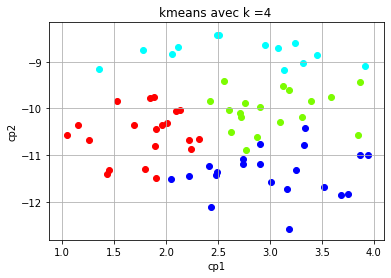

In [41]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
inertie_ = []
n_clusters = [3,4]
for K in n_clusters:
    data = data_frame_kmeans.values
    # Using sklearn
    km = KMeans(n_clusters=K, max_iter=1000)
    preds = km.fit(data)
    #score = silhouette_score(data, preds)
    # Get cluster assignment labels
    labels = km.labels_
    cluster_center = km.cluster_centers_
    if K==1:
        inertie_totale= km.inertia_
        
    inertie_.append(100 * km.inertia_ / inertie_totale)

    tsne = TSNE(n_components=2,perplexity= 50,n_iter=2000).fit_transform(data_frame_kmeans)
    for couleur,k in zip(['blue','lawngreen','red','aqua','yellow'],[j for j in range(K)]):
        plt.scatter(tsne[labels==k,0],tsne[labels==k,1],c=couleur)
        plt.title('kmeans avec k ={0} '.format(K))
        plt.xlabel('cp1')
        plt.ylabel('cp2')
        plt.grid(True)

    C1,C2,C3,C4,C5 = nombre_personne(labels) 
    print('les indiv de chaque cluster sont:',C1,C2,C3,C4,C5)
    print('-----------------------------------------------')
    print('la taille des clusters dans l ordre:',len(C1),len(C2),len(C3),len(C4),len(C5))
    print('-----------------------------------------------')
    print('les centres des clusters:',cluster_center)
    #print('score:',score)
    plt.show()    


In [50]:
data_frame_kmeans

,var_BETA_50_Elec21,var_DELTA_20_Elec9,nbco_BETA_30_Elec4,nbco_DELTA_20_Elec9,var_BETA_70_Elec16,nbco_DELTA_70_Elec5,nbco_ALPHA_50_Elec11,nbco_BETA_70_Elec27,var_DELTA_50_Elec5,nbco_ALPHA_10_Elec5,var_DELTA_20_Elec27,nbco_DELTA_20_Elec27,nbco_ALPHA_50_Elec7,nbco_DELTA_70_Elec27,var_ALPHA_20_Elec11
0,-0.479721,-0.506667,0.055254,0.391369,-0.385364,0.629575,0.391752,-1.170132,-0.425846,-0.579394,-0.685556,-0.544522,-0.868026,0.302320,1.264222
1,-0.955459,-0.366021,-0.939314,-0.249053,-1.869157,1.296184,1.825962,1.344779,2.119046,-0.579394,-0.678646,-0.544522,-0.299864,-1.429150,-0.700235
2,-1.291784,-0.532349,1.049821,-0.249053,-0.070103,0.629575,0.391752,-0.541404,0.760771,-0.579394,-0.167294,0.250186,0.268299,0.549673,0.039226
3,-1.039188,-0.532349,0.055254,-0.889476,-0.376459,-0.037034,1.347892,-3.370679,0.555389,0.724242,-0.798728,-1.339231,1.972787,-2.171209,0.490970
4,-0.347440,-0.284692,0.055254,-0.889476,-0.778478,0.629575,-0.086318,-0.227041,-0.498696,-0.579394,0.312630,-0.014717,0.268299,0.549673,0.457056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.336957,0.468101,-0.939314,0.391369,1.092651,-0.703643,-0.564388,0.716051,-0.865395,-0.579394,3.156080,1.839603,-1.436189,0.797026,-0.678652
68,0.712626,-0.255695,-0.939314,0.391369,1.074533,-1.370251,-1.520528,-0.541404,-0.870763,-0.579394,2.438121,1.309797,-1.436189,1.044379,-0.394463
69,2.226014,-0.333427,-0.939314,-0.249053,1.188908,1.296184,1.347892,0.716051,-0.019287,-0.579394,-0.652171,-0.544522,0.268299,-1.676503,2.055681
70,1.543658,2.956069,-0.939314,1.031792,0.521601,1.296184,-0.086318,1.659142,2.025575,-0.579394,-0.621551,-0.809425,-1.436189,-0.439738,-0.596449


In [33]:
[-9.35491442e-01 -4.96565309e-01  1.04982102e+00 
 -7.18696561e-01  -2.61724218e-01 -8.36964273e-01  
 9.01693268e-01 -1.06534411e+00  -6.05386611e-01 
 1.59333348e+00  9.45372636e-02  5.32749035e-01
   1.13948175e+00  1.86888854e-01  3.05294115e-01]

SyntaxError: invalid syntax (<ipython-input-33-e96f895521cc>, line 1)

In [45]:
data_diff = data_frame_kmeans.iloc[[12, 17, 21, 29, 34, 35, 39, 41, 42, 43, 44, 45, 50, 51, 52, 55, 59, 61, 67, 68],:]

In [48]:
pp.ProfileReport(data_diff)